In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [25]:
def make_partitions(df,
                    partitions,
                    stratify_columns,
                    independent_columns=None,
                    random_seed=None):

    np.random.seed(random_seed)

    if isinstance(partitions, int):
        partitions = [1.0 / partitions for p in range(partitions - 1)]
    elif sum(partitions) >= 1:
        raise Exception('Partitions proportions must sum less than 1')
    partitions.append(1 - sum(partitions))

    n_sets = len(partitions)

    partidx = {i: [] for i in range(n_sets)}

    if independent_columns is not None:
        groups = df.groupby(stratify_columns).groups.items()
        dist = {k: len(v) * np.array(partitions) for k, v in groups}
        part = {k: np.zeros(n_sets) for k, v in groups}

        for k, g in tqdm(df.groupby(independent_columns)):
            diffs = []
            for i, r in g.iterrows():
                group = tuple(r[stratify_columns].to_list())
                diffs.append(dist[group] - part[group])
            pix = np.max(np.array(diffs), 0).argmax()
            gix = np.max(np.array(diffs), 1).argmax()
            partidx[pix].extend(g.index)
            group = tuple(g.iloc[gix][stratify_columns].to_list())
            part[group][pix] += len(g)
    else:
        for k, g in df.groupby(stratify_columns):
            ix = np.tile(np.arange(n_sets),len(g)//n_sets)
            ix = np.hstack([ix,np.random.choice(np.arange(n_sets),len(g)-len(ix), replace=False)])
#             ix = np.random.permutation(
#                 sum([[i] * int(np.ceil(len(g) * p))
#                      for i, p in enumerate(partitions)], []))[:len(g)]
            for i in range(n_sets):
                partidx[i].extend(g[ix == i].index)
    return partidx


In [3]:
df = pd.read_csv('firstimpressions.csv')
df.columns

Index(['filename', 'basename', 'extraversion', 'neuroticism', 'agreeableness',
       'conscientiousness', 'openness', 'labels_mean',
       'yamnet_no_music_20+speech_rate_>0.5',
       'yamnet_no_music_20+speech_rate_>0.6',
       'yamnet_no_music_20+speech_rate_>0.7',
       'yamnet_no_music_20+speech_rate_>0.8',
       'yamnet_no_music_20+speech_rate_>0.9', 'silero_speech_rate>0.5',
       'silero_speech_rate>0.6', 'silero_speech_rate>0.7',
       'silero_speech_rate>0.8', 'silero_speech_rate>0.9', 'ethnicity',
       'gender', 'music'],
      dtype='object')

In [22]:
df.sort_values(['filename'])

,filename,basename,extraversion,neuroticism,agreeableness,conscientiousness,openness,labels_mean,yamnet_no_music_20+speech_rate_>0.5,yamnet_no_music_20+speech_rate_>0.6,...,silero_speech_rate>0.5,silero_speech_rate>0.6,silero_speech_rate>0.7,silero_speech_rate>0.8,silero_speech_rate>0.9,ethnicity,gender,music,labels_mean_quant,partition
9137,--Ymqszjv54.000.wav,--Ymqszjv54,0.420561,0.562500,0.659341,0.475728,0.577778,0.539181,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,2,1,0.0,2,2.0
6222,--Ymqszjv54.001.wav,--Ymqszjv54,0.551402,0.500000,0.527473,0.650485,0.744444,0.594761,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,3,1.0
5640,--Ymqszjv54.003.wav,--Ymqszjv54,0.392523,0.427083,0.516484,0.475728,0.466667,0.455697,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,1,3.0
2882,--Ymqszjv54.004.wav,--Ymqszjv54,0.317757,0.322917,0.549451,0.368932,0.544444,0.420700,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2,1,0.0,1,2.0
6891,--Ymqszjv54.005.wav,--Ymqszjv54,0.299065,0.291667,0.373626,0.320388,0.344444,0.325838,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,zyGz_H1UTnQ.001.wav,zyGz_H1UTnQ,0.233645,0.500000,0.681319,0.844660,0.544444,0.560814,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,2,1,0.0,2,3.0
1151,zyGz_H1UTnQ.002.wav,zyGz_H1UTnQ,0.299065,0.427083,0.472527,0.786408,0.444444,0.485906,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,2,4.0
5467,zyGz_H1UTnQ.003.wav,zyGz_H1UTnQ,0.158879,0.479167,0.549451,0.796117,0.433333,0.483389,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,2,3.0
1112,zyGz_H1UTnQ.004.wav,zyGz_H1UTnQ,0.252336,0.666667,0.494505,0.747573,0.511111,0.534439,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,2,1,0.0,2,3.0


In [4]:
nquant = 4
boundaries = df['labels_mean'].quantile(np.linspace(0,1,nquant))
df['labels_mean_quant'] = np.searchsorted(boundaries, df['labels_mean'])

In [5]:
df.value_counts(['ethnicity','gender','music', 'labels_mean_quant'])

ethnicity  gender  music  labels_mean_quant
2          2       0.0    3                    1605
           1       0.0    1                    1263
                          2                    1201
           2       0.0    2                    1135
                          1                    1111
           1       0.0    3                     885
                   1.0    2                     291
           2       1.0    3                     287
3          2       0.0    1                     276
2          1       1.0    1                     240
                          3                     224
3          2       0.0    2                     213
2          2       1.0    2                     192
                          1                     163
3          2       0.0    3                     134
           1       0.0    1                     115
                          2                     102
1          2       0.0    3                      61
                    

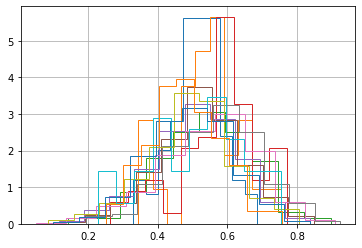

In [6]:
df.groupby(['ethnicity','gender','music'])['labels_mean'].hist(density=True, histtype='step');

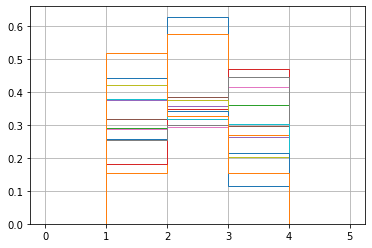

In [7]:
df.groupby(['ethnicity','gender','music'])['labels_mean_quant'].hist(bins=np.arange(6), density=True, histtype='step');

In [26]:
pix = make_partitions(df,5, ['ethnicity','gender','music','labels_mean_quant'], independent_columns='basename')

  0%|          | 0/3060 [00:00<?, ?it/s]

In [27]:
for k,v in pix.items():
    df.loc[v,'partition'] = int(k)

In [28]:
df.value_counts(['ethnicity','gender','music','labels_mean_quant','partition']).unstack()

partition                                   0.0    1.0    2.0    3.0    4.0
ethnicity gender music labels_mean_quant                                   
1         1      0.0   1                    4.0    5.0    NaN    7.0    2.0
                       2                   10.0   11.0    9.0    7.0    7.0
                       3                    2.0    1.0    1.0    3.0    1.0
                 1.0   1                    1.0    1.0    1.0    1.0    NaN
                       2                    7.0    3.0    2.0    1.0    2.0
                       3                    3.0    NaN    2.0    1.0    1.0
          2      0.0   1                   13.0    9.0    4.0   10.0   13.0
                       2                   10.0   17.0    9.0   13.0   10.0
                       3                   17.0    8.0   16.0   12.0    8.0
                 1.0   1                    NaN    6.0    6.0    NaN    NaN
                       2                    5.0    5.0    7.0    3.0    3.0
                       3                    5.0    5.0    6.0   12.0    3.0
2         1      0.0   1                  254.0  228.0  257.0  270.0  254.0
                       2                  226.0  257.0  238.0  234.0  246.0
                       3                  186.0  180.0  158.0  172.0  189.0
                 1.0   1                   62.0   43.0   48.0   45.0   42.0
                       2                   47.0   69.0   63.0   53.0   59.0
                       3                   46.0   46.0   49.0   40.0   43.0
          2      0.0   0                    NaN    NaN    NaN    NaN    1.0
                       1                  205.0  229.0  235.0  227.0  215.0
                       2                  232.0  219.0  231.0  228.0  225.0
                       3                  334.0  322.0  304.0  320.0  325.0
                 1.0   1                   43.0   27.0   31.0   27.0   35.0
                       2                   35.0   37.0   43.0   38.0   39.0
                       3                   51.0   66.0   54.0   62.0   54.0
3         1      0.0   1                   18.0   22.0   21.0   27.0   27.0
                       2                   26.0   17.0   31.0   13.0   15.0
                       3                   12.0   10.0   10.0   17.0    6.0
                 1.0   1                    4.0    7.0    8.0    2.0    4.0
                       2                    6.0    7.0    2.0    4.0    2.0
                       3                    2.0    5.0    8.0    1.0    4.0
          2      0.0   1                   55.0   54.0   43.0   62.0   62.0
                       2                   43.0   35.0   58.0   33.0   44.0
                       3                   19.0   35.0   31.0   29.0   20.0
                 1.0   1                   12.0   16.0   10.0    9.0   10.0
                       2                   12.0    6.0    6.0    5.0    7.0
                       3                    4.0    4.0    3.0    2.0    4.0

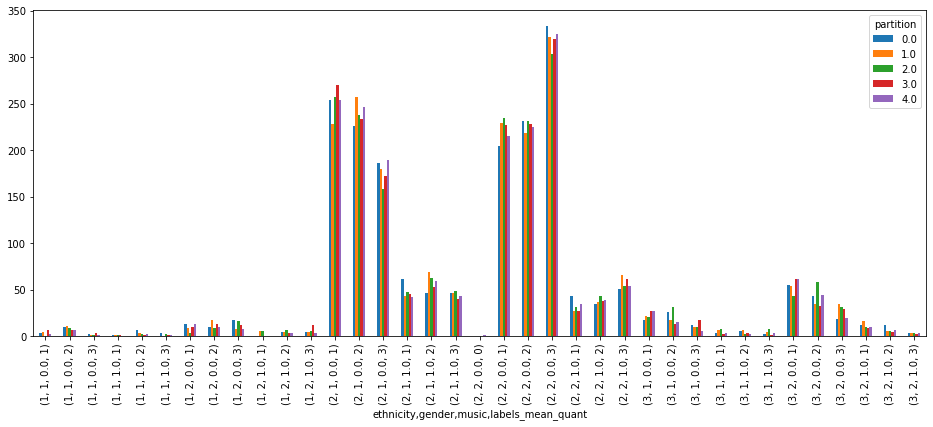

In [29]:
f, ax = plt.subplots(figsize=(16,6))
df.value_counts(['ethnicity','gender','music','labels_mean_quant','partition']).unstack().plot.bar(ax=ax);

In [30]:
df['partition'].value_counts()

1.0    2012
0.0    2011
2.0    2005
3.0    1990
4.0    1982
Name: partition, dtype: int64

In [31]:
df[['filename','partition']].to_csv('first_impressions_parts.csv')

In [32]:
df.to_csv('first_impressions_parts.csv')